<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fetching Data

In [2]:
df=pd.read_csv("insurance_data.csv")

In [3]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [4]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

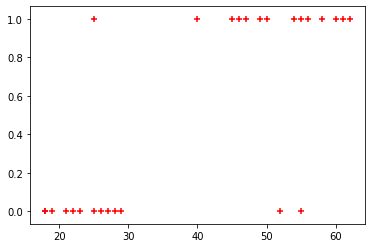

In [5]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.9)

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [8]:
import warnings
warnings.filterwarnings("ignore")
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
X_test

array([[21],
       [50],
       [27]], dtype=int64)

In [10]:
Y_test

array([[0],
       [1],
       [0]], dtype=int64)

In [11]:
prediction=model.predict(X_test)
prediction

array([0, 1, 0], dtype=int64)

In [12]:
model.score(X_test,Y_test)

1.0

In [14]:
model.predict_proba(X_test)
# Shows probabilty distribution for - No  OR  Yes

array([[0.62276894, 0.37723106],
       [0.2717437 , 0.7282563 ],
       [0.54825916, 0.45174084]])

# Problem 2


Employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention
(i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
hr=pd.read_csv("HR_comma_sep.csv")

<h2 style="color:purple">Data exploration and visualization</h2>

In [17]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
hr.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees 
  leaving the firm vs the retained ones (0.66)
  
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Empoloyees who are given promotion are likely to be retained at firm
    

# Salary Vs Left

In [19]:
pd.crosstab(hr.salary,hr.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


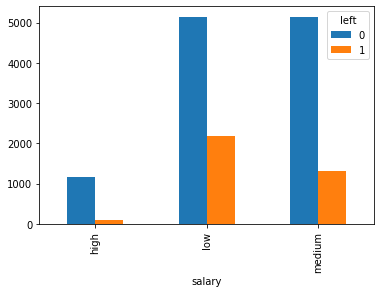

In [20]:
pd.crosstab(hr.salary,hr.left).plot(kind='bar')

# Department Vs Left

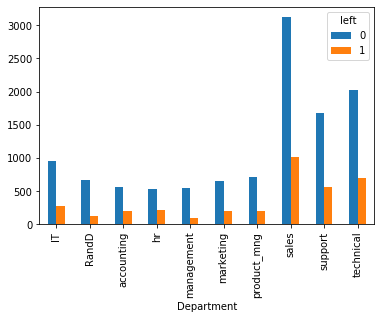

In [43]:
pd.crosstab(hr.Department,hr.left).plot(kind='bar')

From the data analysis so far we can conclude that we will use following variables as independant variables in our model

**Satisfaction Level**

**Average Monthly Hours**

**Promotion Last 5 Years**

**Salary**

In [44]:
salary_dumps=pd.get_dummies(hr.salary,prefix="salary")

In [45]:
salary_dumps.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [46]:
salary_dumps=salary_dumps.iloc[:,:-1]

In [47]:
salary_dumps.head()

,salary_high,salary_low
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1


In [48]:
hrx=pd.concat([hr,salary_dumps],axis='columns')

In [49]:
hrx.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_high,salary_low
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1


In [50]:
hrx=hrx.drop(columns=['salary'])

In [51]:
hrx.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low
0,0.38,0.53,2,157,3,0,1,0,sales,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,0,1


In [52]:
X=hrx[['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high','salary_low']]

In [53]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [54]:
Y=hrx['left']

In [55]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [57]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [58]:
import warnings
warnings.filterwarnings("ignore")
model1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
model1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
model1.score(X_test,Y_test)

0.7816666666666666